# Exploratory Data Analysis: Kickstarter Project 


**Importing Packages and Tools**

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt  

#supressing scientific notation 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#importing the data 
kick = pd.read_csv("C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/ks.csv")

In [3]:
# Keeping only failed and successful companies
kick = kick[(kick['state'] == 'failed') | (kick['state'] == 'successful')]

Note: The original kickstarter dataset had the values that were other than success or failure but we decided to ignore thos values for now. The values were "canceled", "undefined". 

In [4]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.00000,8/11/2015 12:12,0.00000,failed,0,GB,0.00000,0.00000,1533.95000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.00000,9/2/2017 4:43,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.00000,1/12/2013 0:20,220.00000,failed,3,US,220.00000,220.00000,45000.00000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.00000,3/17/2012 3:24,1.00000,failed,1,US,1.00000,1.00000,5000.00000
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,50000.00000,2/26/2016 13:38,52375.00000,successful,224,US,52375.00000,52375.00000,50000.00000


In [5]:
#checking NA values 
kick.isna().sum()

#checking the count of success and failures 
#kick['state'].value_counts()

#kick['currency'].value_counts()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [6]:
kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,331675.00000,331675.00000,331675.00000,331675.00000,331465.00000,331675.00000,331675.00000
mean,1074270646.28906,44251.57306,10584.00355,116.38158,7684.56901,9943.46126,41510.00154
std,619192392.79953,1117916.69906,101591.73182,965.42727,83209.37721,96732.93417,1108929.66305
min,5971.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.01000
25%,537172480.00000,2000.00000,50.00000,2.00000,25.00000,50.00000,2000.00000
50%,1074573261.00000,5000.00000,782.00000,15.00000,502.00000,788.00000,5000.00000
75%,1609843616.50000,15000.00000,4657.00000,63.00000,3421.00000,4608.00000,15000.00000
max,2147476221.00000,100000000.00000,20338986.27000,219382.00000,20338986.27000,20338986.27000,166361390.70000


In [7]:
#creating a new column with number of months 
import datetime
from dateutil.relativedelta import relativedelta 
from datetime import date
import time

#converting deadline string into a date 
kick['deadline_date'] = pd.to_datetime(kick['deadline']).dt.date

#converting launch string into a date 

kick['launched_date'] = pd.to_datetime(kick['launched']).dt.date

In [8]:
#calculating the difference between the dates 
#https://medium.com/@bramtunggala/a-simple-way-to-finding-the-difference-between-two-dates-in-pandas-179d2714b6c 
#diff_days is the difference in months between the date of deadline and launched 

kick['diff_days'] = kick['deadline_date'] - kick['launched_date']

#we had originally thought of coverting it to months, but I feel like days is better as the maximum is 92 days. 
kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,diff_days
count,331675.00000,331675.00000,331675.00000,331675.00000,331465.00000,331675.00000,331675.00000,331675
mean,1074270646.28906,44251.57306,10584.00355,116.38158,7684.56901,9943.46126,41510.00154,33 days 22:55:01.156855
std,619192392.79953,1117916.69906,101591.73182,965.42727,83209.37721,96732.93417,1108929.66305,12 days 17:07:11.920645
min,5971.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.01000,1 days 00:00:00
25%,537172480.00000,2000.00000,50.00000,2.00000,25.00000,50.00000,2000.00000,30 days 00:00:00
50%,1074573261.00000,5000.00000,782.00000,15.00000,502.00000,788.00000,5000.00000,30 days 00:00:00
75%,1609843616.50000,15000.00000,4657.00000,63.00000,3421.00000,4608.00000,15000.00000,36 days 00:00:00
max,2147476221.00000,100000000.00000,20338986.27000,219382.00000,20338986.27000,20338986.27000,166361390.70000,92 days 00:00:00


In [9]:
launched = pd.to_datetime(kick['launched']) 
deadline = pd.to_datetime(kick['deadline']) 

In [11]:
# Creating deadline_year
kick['deadline_year'] = deadline.dt.year

# Creating deadline month
kick['deadline_month'] = deadline.dt.month

# Creating deadline day
kick['deadline_day'] = deadline.dt.day

# Creating deadline weekday
kick['deadline_weekday'] = deadline.dt.weekday #0 is Monday and 6 is Sunday

In [12]:
# Creating launched_year
kick['launched_year'] = launched.dt.year

# Creating launched month
kick['launched_month'] = launched.dt.month

# Creating launched day
kick['launched_day'] = launched.dt.day

# Creating launched weekday
kick['launched_weekday'] = launched.dt.weekday #0 is Monday and 6 is Sunday

kick['launched_hour'] = launched.dt.hour

In [13]:
#converting the difference in days to an integer 
kick['diff_days'] = kick['diff_days'].dt.days

In [15]:
#checking columns 
kick.head()

#checking column types 
kick.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
deadline_date        object
launched_date        object
diff_days             int64
deadline_year         int64
deadline_month        int64
deadline_day          int64
deadline_weekday      int64
launched_year         int64
launched_month        int64
launched_day          int64
launched_weekday      int64
launched_hour         int64
dtype: object

In [16]:
#Converting main category to numerical so we can see its correlation to the state
from sklearn.preprocessing import LabelEncoder

#------------------------------------------------------------------------
#converting country to numerical 
kick['country'].value_counts()

#saving the values to an object 
kick_country_cat = kick[['country']].values

#using the label encoder to change the categorical variables to numeric 
le = LabelEncoder()

cn = le.fit_transform(kick_country_cat)

kick['country_recoded'] = cn 

#-------------------------------------------------------------------------
#converting main category to numerical 
kick['main_category'].value_counts()

#saving the values to an object 
kick_mc_cat = kick[['main_category']].values

#using the label encoder to change the categorical variables to numeric 
le = LabelEncoder()

mc = le.fit_transform(kick_mc_cat)

kick['main_category_recoded'] = mc

#-------------------------------------------------------------------------
#converting sub-category to numerical 
kick['category'].value_counts()

#saving the values to an object 
kick_category_recoded = kick[['category']].values

#using the label encoder to change the categorical variables to numeric 
le = LabelEncoder()

sub_cat = le.fit_transform(kick_category_recoded)

kick['subcategory_recoded'] = sub_cat

C:\Users\mayaa\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,deadline_day,deadline_weekday,launched_year,launched_month,launched_day,launched_weekday,launched_hour,country_recoded,main_category_recoded,subcategory_recoded
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.00000,8/11/2015 12:12,0.00000,failed,...,9,4,2015,8,11,1,12,9,12,108
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.00000,9/2/2017 4:43,2421.00000,failed,...,1,2,2017,9,2,5,4,22,6,93
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.00000,1/12/2013 0:20,220.00000,failed,...,26,1,2013,1,12,5,0,22,6,93
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.00000,3/17/2012 3:24,1.00000,failed,...,16,0,2012,3,17,5,3,22,10,90
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,50000.00000,2/26/2016 13:38,52375.00000,successful,...,1,4,2016,2,26,4,13,22,7,123


In [18]:
kick['name_length'] = kick['name'].str.len()


In [21]:
#function to recode the target to numerical so we can look at the correaltion between target and other variables as well 
def recoded(x):
    if x=='successful':
        return 1
    if x=='failed':
        return 0
    
#creating a new column with recoded target 
kick['recoded_target'] = kick['state'].apply(recoded)

kick.head()
print(list(kick))

['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'deadline_date', 'launched_date', 'diff_days', 'deadline_year', 'deadline_month', 'deadline_day', 'deadline_weekday', 'launched_year', 'launched_month', 'launched_day', 'launched_weekday', 'launched_hour', 'country_recoded', 'main_category_recoded', 'subcategory_recoded', 'name_length', 'recoded_target']


In [20]:
kick.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick_final.csv', index = None)

In [22]:
print(list(kick))

#selecting only the columns we might want to use 
#saving only the columns needed for modeling + the ID column for refrence 
kick1 = kick.iloc[:, np.r_[0,14,17:len(kick.columns)]]

['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'deadline_date', 'launched_date', 'diff_days', 'deadline_year', 'deadline_month', 'deadline_day', 'deadline_weekday', 'launched_year', 'launched_month', 'launched_day', 'launched_weekday', 'launched_hour', 'country_recoded', 'main_category_recoded', 'subcategory_recoded', 'name_length', 'recoded_target']


In [24]:
kick1.head()

,ID,usd_goal_real,diff_days,deadline_year,deadline_month,deadline_day,deadline_weekday,launched_year,launched_month,launched_day,launched_weekday,launched_hour,country_recoded,main_category_recoded,subcategory_recoded,name_length,recoded_target
0,1000002330,1533.95000,59,2015,10,9,4,2015,8,11,1,12,9,12,108,31.00000,0
1,1000003930,30000.00000,60,2017,11,1,2,2017,9,2,5,4,22,6,93,45.00000,0
2,1000004038,45000.00000,45,2013,2,26,1,2013,1,12,5,0,22,6,93,14.00000,0
3,1000007540,5000.00000,30,2012,4,16,0,2012,3,17,5,3,22,10,90,49.00000,0
5,1000014025,50000.00000,35,2016,4,1,4,2016,2,26,4,13,22,7,123,20.00000,1


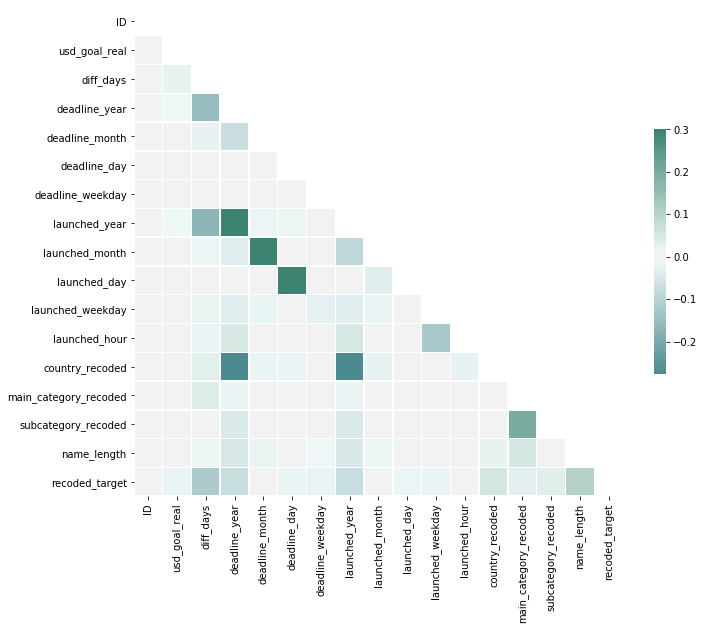

In [25]:
#correlation matrix 
corrmatrix = kick1.corr()
corrmatrix 

#not sure how to do this because there are SO many categories, but we might have to recode the category in some way but it has 21,000+ categories 

#prettier correlation matrix 
#SOURCE: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(corrmatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 165, as_cmap=True)
sns.heatmap(corrmatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
kick1.head()

,ID,usd_goal_real,diff_days,deadline_year,deadline_month,deadline_day,deadline_weekday,launched_year,launched_month,launched_day,launched_weekday,launched_hour,country_recoded,main_category_recoded,subcategory_recoded,name_length,recoded_target
0,1000002330,1533.95000,59,2015,10,9,4,2015,8,11,1,12,9,12,108,31.00000,0
1,1000003930,30000.00000,60,2017,11,1,2,2017,9,2,5,4,22,6,93,45.00000,0
2,1000004038,45000.00000,45,2013,2,26,1,2013,1,12,5,0,22,6,93,14.00000,0
3,1000007540,5000.00000,30,2012,4,16,0,2012,3,17,5,3,22,10,90,49.00000,0
5,1000014025,50000.00000,35,2016,4,1,4,2016,2,26,4,13,22,7,123,20.00000,1


In [28]:
#saving the dataset used for modeling as a csv 

kick1.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kickmodeling.csv', index = None)

## Generating Random Datasets to Reduce the Size of the Data 

In [29]:
kick1.head()
print(list(kick1))

['ID', 'usd_goal_real', 'diff_days', 'deadline_year', 'deadline_month', 'deadline_day', 'deadline_weekday', 'launched_year', 'launched_month', 'launched_day', 'launched_weekday', 'launched_hour', 'country_recoded', 'main_category_recoded', 'subcategory_recoded', 'name_length', 'recoded_target']


In [30]:
# Retrieve features/attributes of dataset
print(list(kick1))
X = kick1.iloc[:, 1:16]

# Retrieve target variable of dataset
y = kick1.iloc[:,16]




['ID', 'usd_goal_real', 'diff_days', 'deadline_year', 'deadline_month', 'deadline_day', 'deadline_weekday', 'launched_year', 'launched_month', 'launched_day', 'launched_weekday', 'launched_hour', 'country_recoded', 'main_category_recoded', 'subcategory_recoded', 'name_length', 'recoded_target']


In [31]:
#checking class balance for the full dataset (to be used for modeling)
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [197719 133956]


#### 10k, 15k, 20k, 30k 

In [ ]:
#taking random samples of different datasets, checking the balance and saving it as a different dataframe to use for modeling 
#kick10k = kick1.sample(n=10000, axis = 0) 
#y1 = kick10k.iloc[:,15]
#print('Labels counts in y:', np.bincount(y1))
#Labels counts in y: [5953 4047] -> pretty balanced 

In [ ]:
#kick10k.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick10k.csv', index = None)

In [ ]:
#taking random samples of different datasets, checking the balance and saving it as a different dataframe to use for modeling 
#kick15k = kick1.sample(n=15000, axis = 0) 
#y2 = kick15k.iloc[:,15]
#print('Labels counts in y:', np.bincount(y2))
#Labels counts in y: [8839 6161] -> pretty balanced 

In [ ]:
#kick15k.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick15k.csv', index = None)

In [ ]:
#taking random samples of different datasets, checking the balance and saving it as a different dataframe to use for modeling 
#kick20k = kick1.sample(n=20000, axis = 0) 
#y3 = kick20k.iloc[:,15]
print('Labels counts in y:', np.bincount(y3))
#Labels counts in y: [11871  8129] -> pretty balanced 

In [ ]:
#kick20k.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick20k.csv', index = None)

In [ ]:
#taking random samples of different datasets, checking the balance and saving it as a different dataframe to use for modeling 
#kick30k = kick1.sample(n=30000,axis = 0) 
#y4 = kick30k.iloc[:,15]
print('Labels counts in y:', np.bincount(y4))
#Labels counts in y: [17767 12233] -> pretty balanced 

In [ ]:
#kick30k.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick30k.csv', index = None)

In [ ]:
#taking random samples of different datasets, checking the balance and saving it as a different dataframe to use for modeling 

#kick10kv2 = kick1.sample(n=10000, axis = 0) 
#y5 = kick10kv2.iloc[:,15]
#print('Labels counts in y:', np.bincount(y5))
#Labels counts in y: [5932 4068]
#kick10kv2.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick10kv2.csv', index = None)

In [ ]:
#kick20kv2 = kick1.sample(n=20000, axis = 0) 
#y6 = kick20kv2.iloc[:,15]
#print('Labels counts in y:', np.bincount(y6))

In [ ]:
#kick20kv2.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick20kv2.csv', index = None)

In [ ]:
#kick25kv2 = kick1.sample(n=25000, axis = 0) 
#y7 = kick20kv2.iloc[:,15]
#print('Labels counts in y:', np.bincount(y7))

In [ ]:
#kick25kv2.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick25kv2.csv', index = None)

In [32]:
#kick1.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick1.csv', index = None)

In [53]:
kick20k_new = kick1.sample(n=20000,axis = 0) 
y8 = kick20k_new.iloc[:,16]
print('Labels counts in y:', np.bincount(y8))

Labels counts in y: [11852  8148]


In [55]:
kick1.tail()

,ID,usd_goal_real,diff_days,deadline_year,deadline_month,deadline_day,deadline_weekday,launched_year,launched_month,launched_day,launched_weekday,launched_hour,country_recoded,main_category_recoded,subcategory_recoded,name_length,recoded_target
378654,999975836,6500.00000,30,2017,4,19,2,2017,3,20,0,22,22,7,130,37.00000,0
378657,999977640,1500.00000,27,2011,7,19,1,2011,6,22,2,3,22,6,93,9.00000,0
378658,999986353,15000.00000,46,2010,8,16,0,2010,7,1,3,19,22,6,93,71.00000,0
378659,999987933,15000.00000,31,2016,2,13,5,2016,1,13,2,18,22,13,138,24.00000,0
378660,999988282,2000.00000,28,2011,8,16,1,2011,7,19,1,9,22,0,98,33.00000,0


In [54]:
kick20k_new.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick20k_new.csv', index = None)

### Visualizations 

In [34]:
ks = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kickmodeling.csv')
kick_fin = ks = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick_final.csv')

In [44]:

ks = ks.dropna()

ks['name_length']=ks['name_length'].round(1)
ks.head()

kick_fin = ks.dropna()

kick_fin['name_length']=kick_fin['name_length'].round(1)
kick_fin.head()
print(list(kick_fin))


['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'deadline_date', 'launched_date', 'diff_days', 'deadline_year', 'deadline_month', 'deadline_day', 'deadline_weekday', 'launched_year', 'launched_month', 'launched_day', 'launched_weekday', 'launched_hour', 'country_recoded', 'main_category_recoded', 'subcategory_recoded', 'name_length', 'recoded_target']


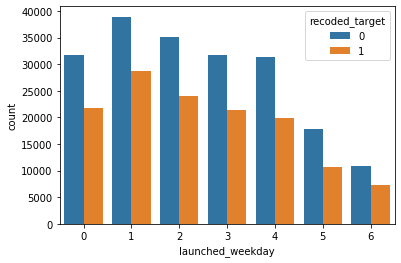

In [36]:
sns.countplot(x="launched_weekday",hue="recoded_target", data = kick_fin)

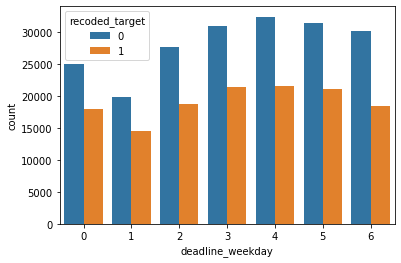

In [37]:
sns.countplot(x="deadline_weekday",hue="recoded_target", data = kick_fin)

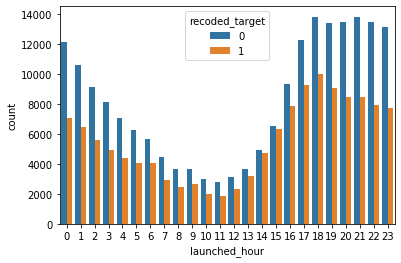

In [38]:
sns.countplot(x="launched_hour",hue="recoded_target", data = kick_fin)

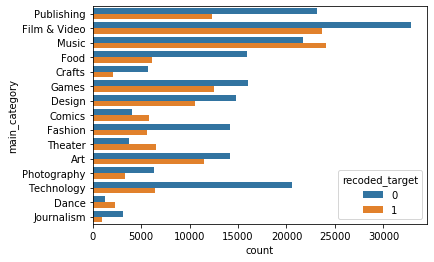

In [43]:
sns.countplot(y="main_category",hue="recoded_target", data = kick_fin)

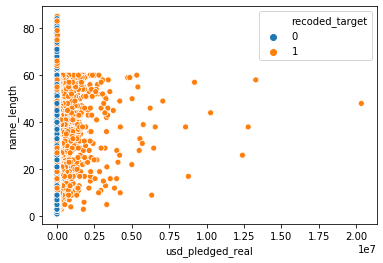

In [46]:
sns.scatterplot(data=kick_fin, x="usd_pledged_real", y = "name_length", hue = "recoded_target") 